In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',0)

,ID,Customer ID
0,Age,Customer's age in completed years
1,Experience,#years of professional experience
2,Income,Annual income of the customer ($000)
3,ZIPCode,Home Address ZIP code.
4,Family,Family size of the customer
5,CCAvg,Avg. spending on credit cards per month ($000)
6,Education,Education Level. 1: Undergrad; 2: Graduate; 3:...
7,Mortgage,Value of house mortgage if any. ($000)
8,Personal Loan,Did this customer accept the personal loan off...
9,Securities Account,Does the customer have a securities account wi...


In [3]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',1)

In [4]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
df.shape

(5000, 14)

In [6]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [9]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [10]:
fig=px.box(df,y=['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

#### Five point summary suggest that Experience has negative value(This should be fixed).
    we can see the Min, Max, mean and std deviation for all key attributes of the dataset
    Income has too much noise and slightly skewed right, Age and exp are equally distributed.

In [11]:
df.skew() #+ve means big outlier and -ve means low outlier

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>],
       [<AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>]], dtype=object)

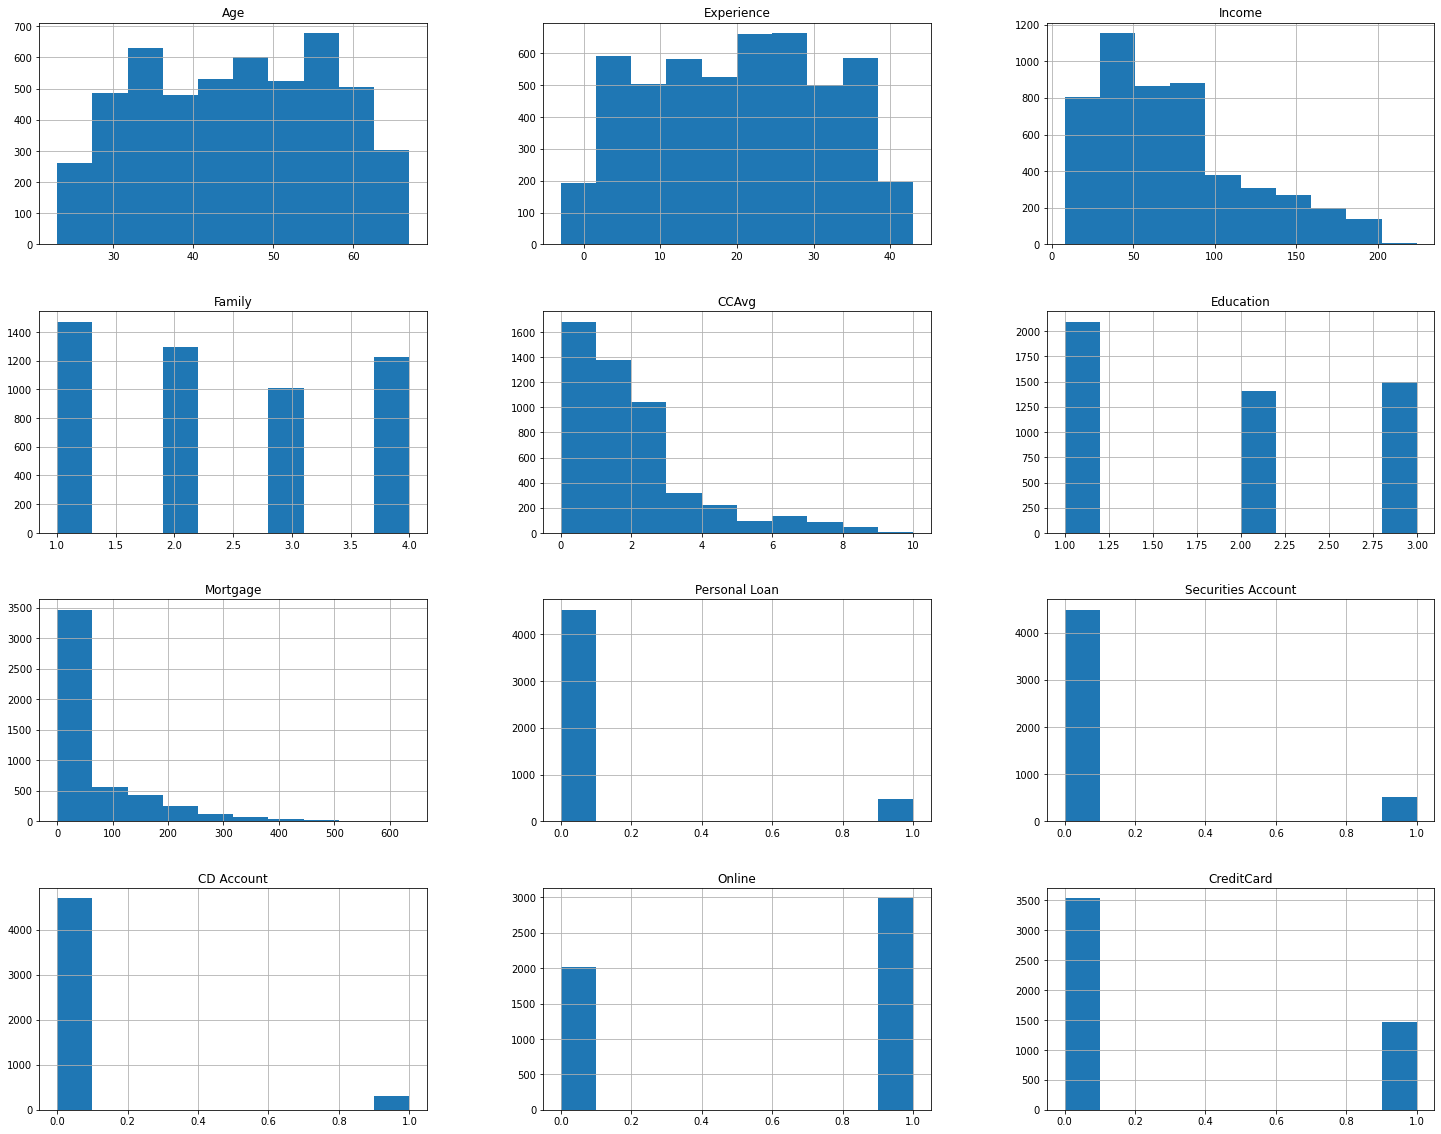

In [12]:
df.hist(figsize=(25,20))

#### INFERENCE from Histogram
    1.Age & Experience are to an extent equally distributed
    2.Income & Credit card spending are skewed to the left
    3.We have more Undergraduates than Graduate and Advanced & Professional
    4.60% of customers have enabled online banking and went digital

C:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:xlabel='Experience', ylabel='Density'>

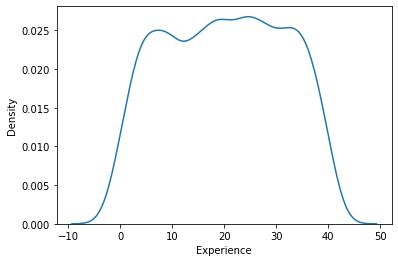

In [13]:
sns.distplot(df['Experience'],hist = False)

In [14]:
df['Experience'].mean()  #above picture contain some negative value we need to remove it

20.1046

In [15]:
Negative_exp=df[df['Experience']<0]
Negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


C:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

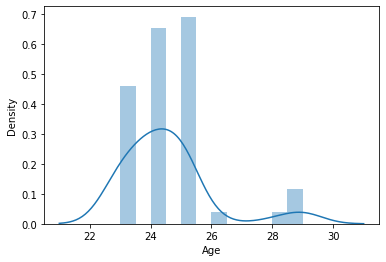

In [16]:
sns.distplot(Negative_exp['Age'])

In [17]:
Negative_exp['Experience'].mean()

-1.4423076923076923

In [18]:
Negative_exp.size

624

In [19]:
data=df.copy()

In [20]:
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])

In [21]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


<AxesSubplot:>

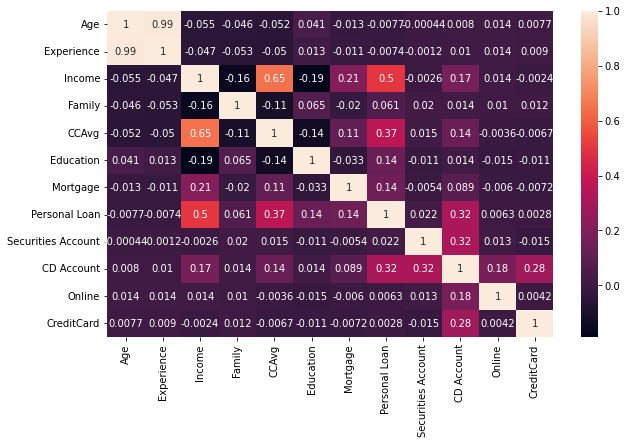

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [23]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [24]:
def mark(x):
    if x ==1:
        return 'Intermediate'
    elif x==2:
        return 'Graduate'
    else:
        return 'Masters'

In [25]:
data['Edu_Status'] = data['Education'].apply(mark) 

In [26]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_Status
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0,Intermediate
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0,Intermediate
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0,Intermediate
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [27]:
EDU_display=data.groupby('Edu_Status')['Age'].count()

In [28]:
EDU_display

Edu_Status
Graduate        1403
Intermediate    2096
Masters         1501
Name: Age, dtype: int64

In [29]:
fig = px.pie(data,values=EDU_display,names=EDU_display.index,title='Piechart of Educated person who apply for loan')
fig.show()

In [30]:
Family = data.groupby('Family')['Age'].count()

In [31]:
fig = px.pie(data,values=Family,names=Family.index,title='Piechart of Size of Family who apply for loan')
fig.show()

In [32]:
def Security_CD(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return 'Holds Securites & Deposit'
    elif (row['Securities Account']==0) & (row['CD Account']==0):
        return 'Does not Holds Securites or Deposit'
    elif (row['Securities Account']==1) & (row['CD Account']==0):
        return ' Holds only Securites '
    elif (row['Securities Account']==0) & (row['CD Account']==1):
        return ' Holds only Deposit'

In [33]:
data['Account_holder_category']=data.apply(Security_CD,axis=1)

In [34]:
values=data['Account_holder_category'].value_counts()

In [35]:
fig=px.pie(data,values=values, names=values.index,title='Pie CHart')
fig.show()

#### We could see that alomst 87% of customers do not hold any securities or deposit, and 3 % hold both securities as well as deposit. It will be good if we encourage those 87% to open any of these account as it will improve the assests of the bank

In [36]:
px.box(data,x='Education',y='Income',facet_col='Personal Loan')

C:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



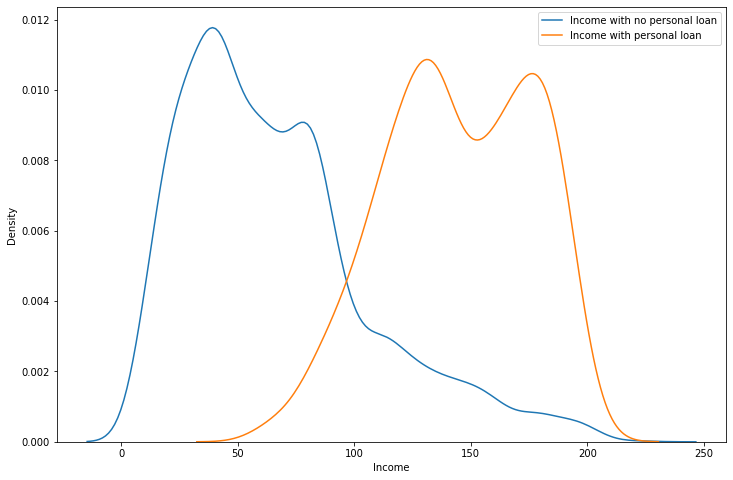

In [37]:
plt.figure(figsize=(12,8))
sns.distplot(data[data['Personal Loan']==0]['Income'],hist=False,label='Income with no personal loan')
sns.distplot(data[data['Personal Loan']==1]['Income'],hist=False,label='Income with personal loan')
plt.legend()

In [38]:
def plot(col1,col2,label1,label2,title):
    plt.figure(figsize=(12,8))
    sns.distplot(data[data[col2]==0][col1],hist=False,label=label1)
    sns.distplot(data[data[col2]==1][col1],hist=False,label=label2)
    plt.legend()
    plt.title(title)

C:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



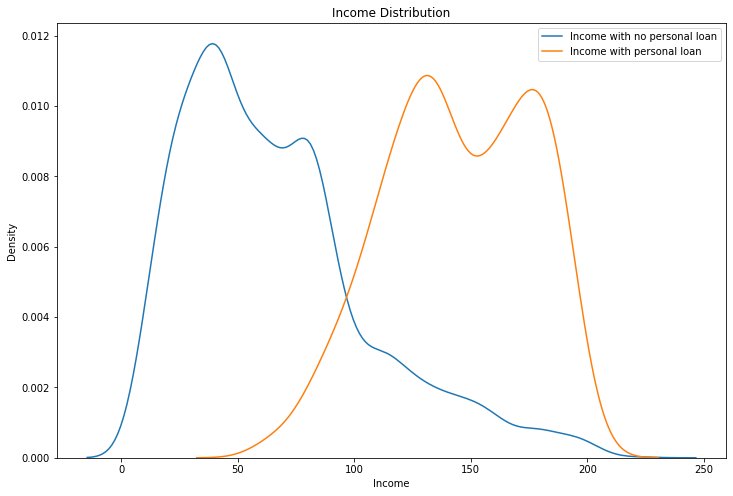

In [39]:
plot('Income','Personal Loan','Income with no personal loan','Income with personal loan','Income Distribution')

#### Conclusion: Customers Who have availed personal loan seem to have higher income than those who do not have personal loan

In [40]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Edu_Status', 'Account_holder_category'],
      dtype='object')

In [41]:
col_names=['Securities Account','Online','Account_holder_category','CreditCard']

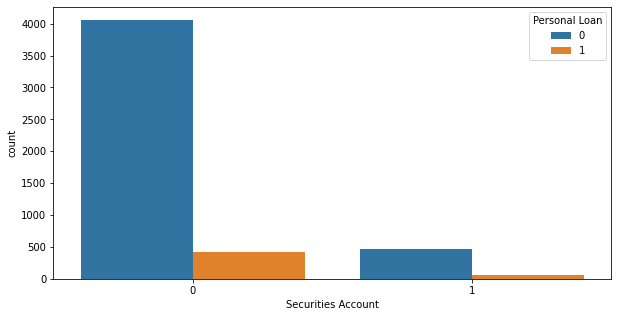

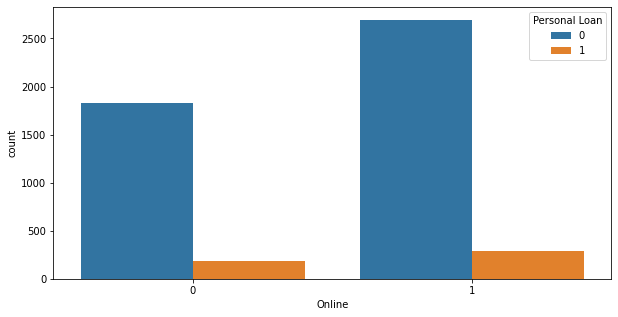

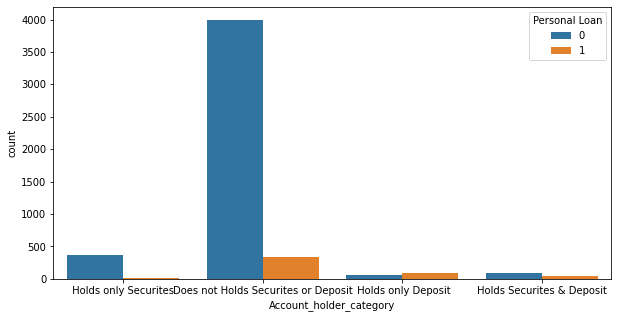

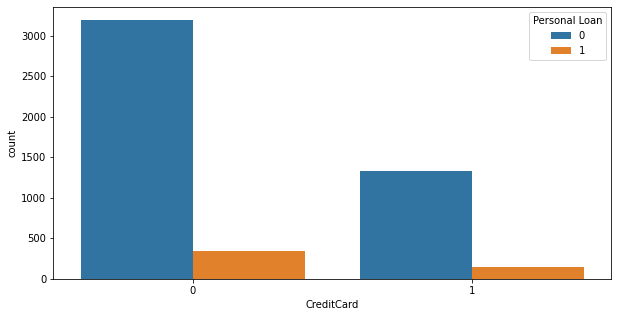

In [42]:
for i in col_names:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,hue='Personal Loan',data=data)

# Perform Hypothesis Testing

In [43]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Edu_Status', 'Account_holder_category'],
      dtype='object')

## Does the family size makes them to avail loan ?

<AxesSubplot:xlabel='Family', ylabel='count'>

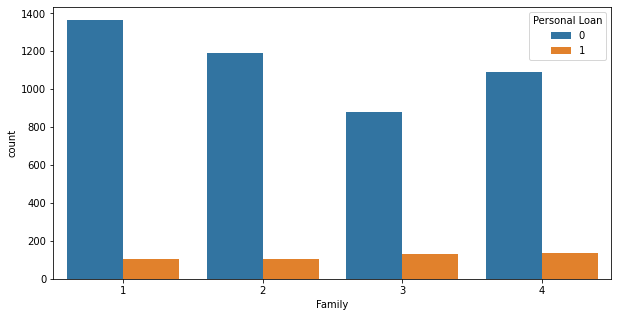

In [44]:

plt.figure(figsize=(10,5))
sns.countplot(x='Family',hue='Personal Loan',data=data)

Yes, Large member family get loan approval easily


## Does Income of a person have an impact on availing loan ?

C:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Income', ylabel='Personal Loan'>

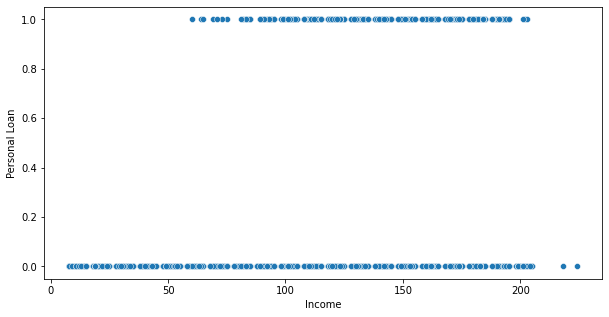

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(data['Income'],data['Personal Loan'])

Yes,People whose Income less than 60$ doesn't get loan. 

## How Age of a person is going to be a factor in availing loan ?

C:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age', ylabel='Personal Loan'>

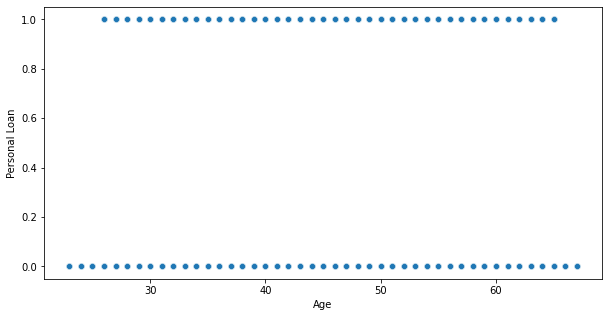

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(data['Age'],data['Personal Loan'])

People who have age low than 26 and age higher than 65 doesn't get loan.

In [47]:
df_filtered = df[df['Personal Loan'] == 1]

In [48]:
df_filtered.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,45.066667,19.843750,144.745833,2.612500,3.905347,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,11.590964,11.582443,31.584429,1.115393,2.097679,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,26.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,35.000000,9.000000,122.000000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,45.000000,20.000000,142.500000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,55.000000,30.000000,172.000000,4.000000,5.350000,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,65.000000,41.000000,203.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


# This Analysis done by Rohit Kumar ! Thank You